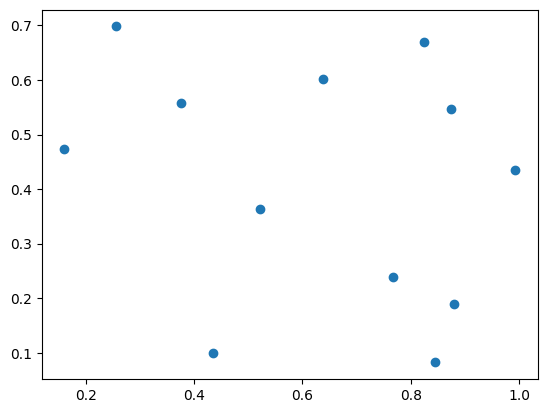

In [1]:
import json
from GenerateTestData import readCustomDataset, createCustomDataset
import matplotlib.pyplot as plt
import numpy as np



data = createCustomDataset(num_turbines=12, min_distance=.1, bird_radius=.3)

plt.scatter(*zip(*data))

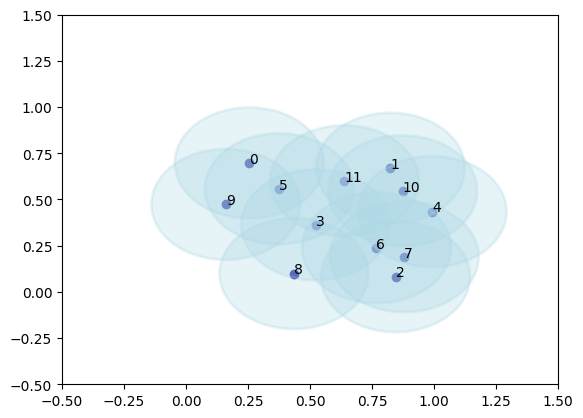

In [2]:
from Graph import Graph

#def drawGraph(graph, radius):
#    fig, ax = plt.subplots()
#    
#    
##    # Scatter plot of data points
##    for i, point in enumerate(graph.vertices.values()):
 #       ax.scatter(*point, color='darkblue', label="Data points")
#        ax.annotate(str(i), (point[0], point[1]))
    
    # Add circles around each point
#    for (i, j) in data:
#        circle = plt.Circle((i, j), radius=radius, color='lightblue', lw=2, alpha=.3)
#        ax.add_artist(circle)
#    
#    ax.set_ylim(-0.5,1.5)
#    ax.set_xlim(-0.5,1.5)
#    
#    plt.show()

def drawGraph(graph, radius):
    fig, ax = plt.subplots()
    
    
    # Scatter plot of data points
    for i, point in enumerate(graph.vertices.values()):
        ax.scatter(*point, color='darkblue', label="Data points")
        ax.annotate(str(i), (point[0], point[1]))
    
    # Add circles around each point
    for i, point in enumerate(graph.vertices.values()):
        circle = plt.Circle((point), radius=radius, color='lightblue', lw=2, alpha=.3)
        ax.add_artist(circle)
    
    ax.set_ylim(-0.5,1.5)
    ax.set_xlim(-0.5,1.5)
    
    plt.show()

graph = Graph(data, 0.3)
drawGraph(graph, 0.3)

In [3]:
print(data)

[[0.2551624507692549, 0.6979648651060734], [0.8243895943003167, 0.669230356136258], [0.8454540296449877, 0.08231640532830076], [0.5223690824537803, 0.3629233386892553], [0.9926301630401333, 0.4341173440679257], [0.37563107747561264, 0.5575025524354169], [0.7680044800912831, 0.23872916633904528], [0.8800737814083998, 0.19036421589965535], [0.4354820006135137, 0.09897021514086157], [0.16055469889208984, 0.4735367062896362], [0.8740480827523994, 0.5467629565202862], [0.638654078935968, 0.6009099350297622]]


[(0, 3), (0, 5), (0, 9), (0, 11), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 10), (1, 11), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 6), (4, 7), (4, 10), (4, 11), (5, 8), (5, 9), (5, 10), (5, 11), (6, 7), (6, 8), (6, 10), (6, 11), (7, 8), (7, 10), (7, 11), (8, 9), (9, 11), (10, 11)]


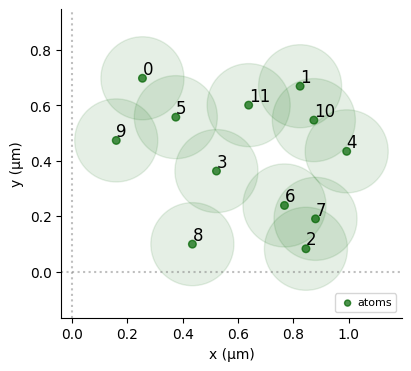

Max independent set:  [0, 1, 2]
Max independent set:  [3]
Max independent set:  [2, 5]
Max independent set:  [4, 5]
Max independent set:  [0, 6]
Max independent set:  [5, 6]
Max independent set:  [0, 7]
Max independent set:  [5, 7]
Max independent set:  [0, 1, 8]
Max independent set:  [0, 4, 8]
Max independent set:  [1, 2, 9]
Max independent set:  [4, 9]
Max independent set:  [6, 9]
Max independent set:  [7, 9]
Max independent set:  [0, 8, 10]
Max independent set:  [9, 10]
Max independent set:  [2, 11]
Max independent set:  [8, 11]

Minimum Max Independent Set:  [3]


In [4]:
%load_ext autoreload
%autoreload 2

from pulser import Register
from Graph import Graph

graph = Graph(data,0.5)

print(graph.edges)

qubits = dict(enumerate([[v for v in c] for c in data]))
reg = Register(qubits)
reg.draw(
    blockade_radius=.3,
    draw_graph=False,
    draw_half_radius=True,
)

powerSet = graph.generatePowerSet()
maxIndSets = []
for subset in powerSet:
    if graph.checkMaxIndependentSet(subset):
        print("Max independent set: ", subset)
        maxIndSets.append(subset)

minMIS = maxIndSets[0]
for mis in maxIndSets:
    if len(mis) < len(minMIS):
        minMIS = mis

print("\nMinimum Max Independent Set: ", minMIS)



In [5]:
radius_B = [0.5,0.4,0.3,0.2,0.1]
testcases = []
min = 0.2
for i in range(len(radius_B)):
    testcases.append(createCustomDataset(20,min,radius_B[i],output_path = 'Datasets//testcases'+str(i)+'.json'))
print(len(testcases))

5


In [6]:
radius_B = [0.5,0.4,0.3,0.2,0.1]
min = 0.2
smalltestcases = []
for i in range(len(radius_B)):
    smalltestcases.append(createCustomDataset(8,min,radius_B[i],output_path = 'Datasets//small-testcases'+str(i)+'.json'))
print(len(smalltestcases))

5


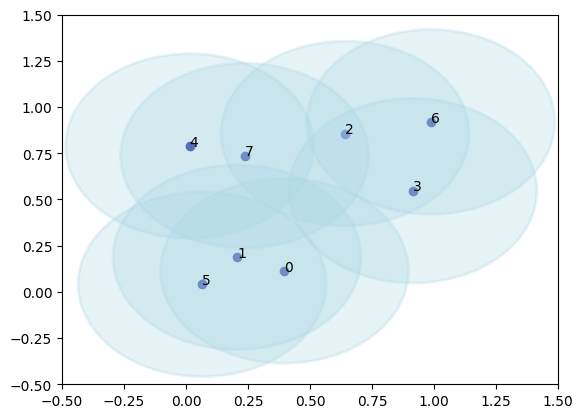

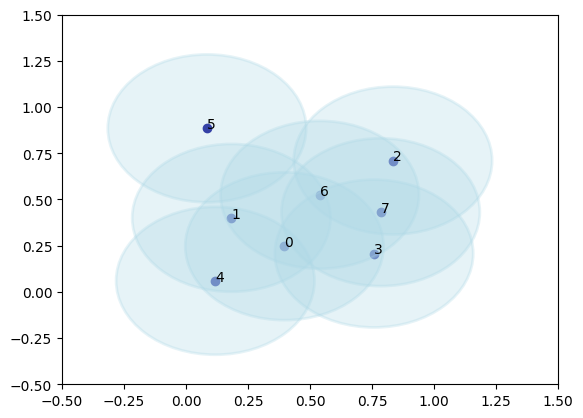

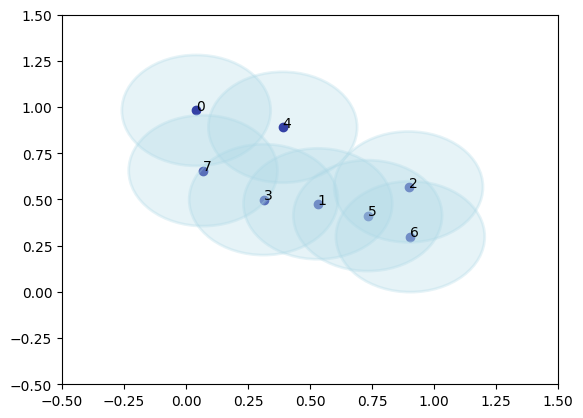

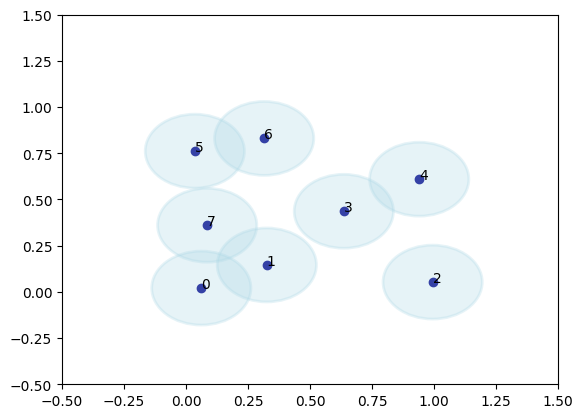

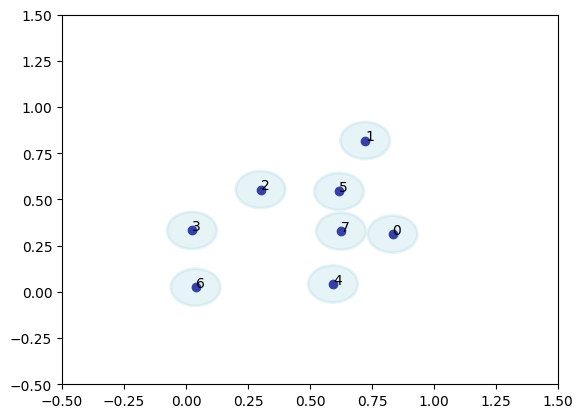

In [7]:

graphs = []

for i in range(len(smalltestcases)):
    graph = Graph(smalltestcases[i],radius_B[i])
    graphs.append(graph)
    drawGraph(graph,radius_B[i-5])


[(0, 1), (0, 5), (1, 5), (2, 3), (2, 6), (2, 7), (3, 6), (4, 7)]


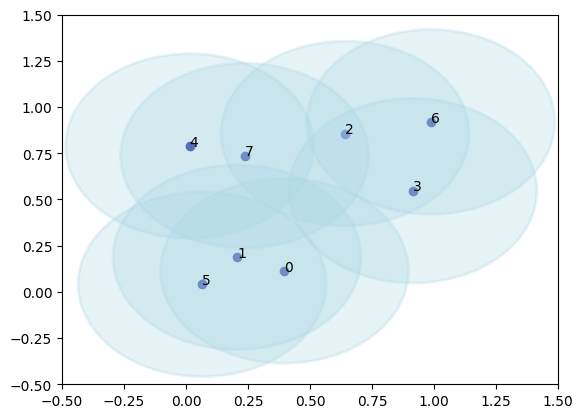

Max independent set:  [0, 2, 4]
Max independent set:  [1, 2, 4]
Max independent set:  [0, 3, 4]
Max independent set:  [1, 3, 4]
Max independent set:  [2, 4, 5]
Max independent set:  [3, 4, 5]
Max independent set:  [0, 4, 6]
Max independent set:  [1, 4, 6]
Max independent set:  [4, 5, 6]
Max independent set:  [0, 3, 7]
Max independent set:  [1, 3, 7]
Max independent set:  [3, 5, 7]
Max independent set:  [0, 6, 7]
Max independent set:  [1, 6, 7]
Max independent set:  [5, 6, 7]

Minimum Max Independent Set:  [0, 2, 4]
[(0, 1), (0, 3), (0, 4), (0, 6), (1, 4), (1, 6), (2, 6), (2, 7), (3, 6), (3, 7), (6, 7)]


<Figure size 640x480 with 0 Axes>

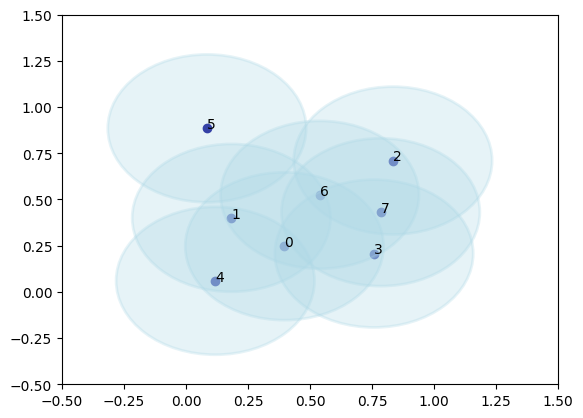

Max independent set:  [0, 2, 5]
Max independent set:  [1, 2, 3, 5]
Max independent set:  [2, 3, 4, 5]
Max independent set:  [4, 5, 6]
Max independent set:  [0, 5, 7]
Max independent set:  [1, 5, 7]
Max independent set:  [4, 5, 7]

Minimum Max Independent Set:  [0, 2, 5]
[(1, 3), (1, 5), (2, 5), (2, 6), (3, 7), (5, 6)]


<Figure size 640x480 with 0 Axes>

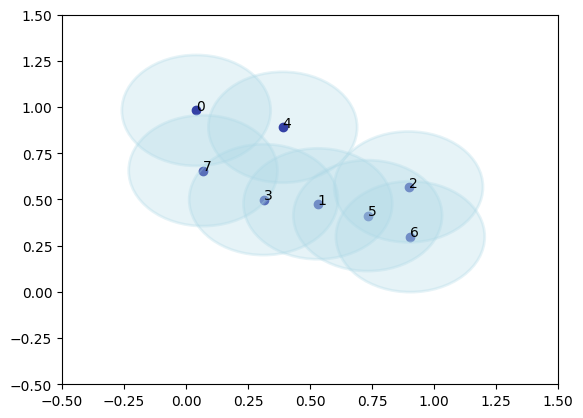

Max independent set:  [0, 2, 3, 4]
Max independent set:  [0, 3, 4, 5]
Max independent set:  [0, 3, 4, 6]
Max independent set:  [0, 1, 2, 4, 7]
Max independent set:  [0, 4, 5, 7]
Max independent set:  [0, 1, 4, 6, 7]

Minimum Max Independent Set:  [0, 2, 3, 4]
[]


<Figure size 640x480 with 0 Axes>

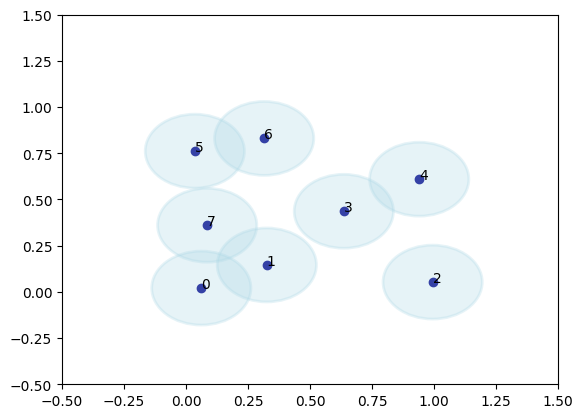

Max independent set:  [0, 1, 2, 3, 4, 5, 6, 7]

Minimum Max Independent Set:  [0, 1, 2, 3, 4, 5, 6, 7]
[]


<Figure size 640x480 with 0 Axes>

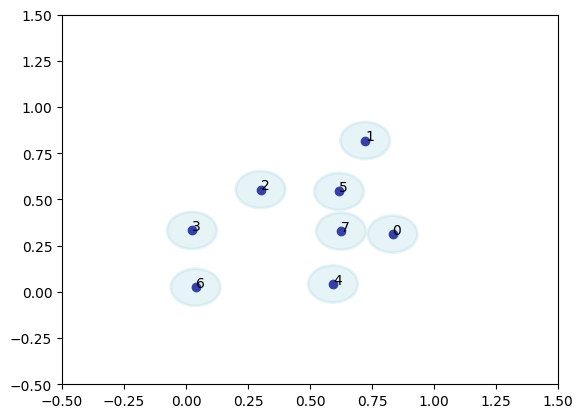

Max independent set:  [0, 1, 2, 3, 4, 5, 6, 7]

Minimum Max Independent Set:  [0, 1, 2, 3, 4, 5, 6, 7]


<Figure size 640x480 with 0 Axes>

In [11]:
for i in range(len(smalltestcases)):
    graph = Graph(smalltestcases[i],radius_B[i])
    print(graph.edges)

    qubits = dict(enumerate([[v for v in c] for c in smalltestcases[i]]))
    reg = Register(qubits)
    #reg.draw(
    #    blockade_radius=2*radius_B[i],
    #    draw_graph=False,
    #    draw_half_radius=True,
    #)
    drawGraph(graph, radius_B[i])
   
    powerSet = graph.generatePowerSet()
    maxIndSets = []
    for subset in powerSet:
        if graph.checkMaxIndependentSet(subset):
            print("Max independent set: ", subset)
            maxIndSets.append(subset)

    minMIS = maxIndSets[0]
    for mis in maxIndSets:
        if len(mis) < len(minMIS):
            minMIS = mis

    print("\nMinimum Max Independent Set: ", minMIS)



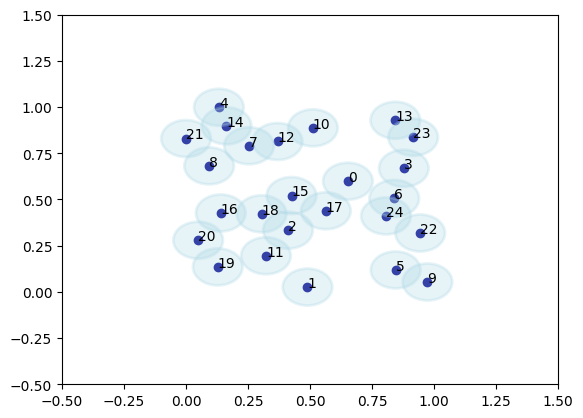

In [24]:
hugedata = createCustomDataset(25,0.1,0.25)
graph = Graph(hugedata,0.1)
drawGraph(graph, 0.1)

[(0, 3), (0, 6), (0, 15), (0, 17), (0, 24), (1, 11), (2, 11), (2, 15), (2, 17), (2, 18), (3, 6), (3, 23), (4, 7), (4, 14), (4, 21), (5, 9), (5, 22), (6, 22), (6, 24), (7, 8), (7, 12), (7, 14), (8, 14), (8, 21), (10, 12), (11, 18), (11, 19), (12, 14), (13, 23), (14, 21), (15, 17), (15, 18), (16, 18), (16, 20), (17, 24), (19, 20), (22, 24)]


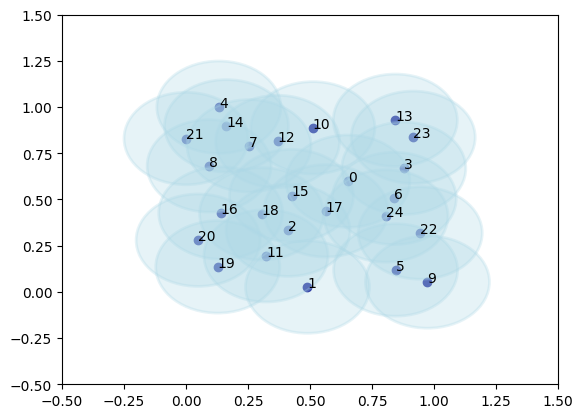

Max independent set:  [0, 4, 5, 8, 10, 11, 13, 16]
Max independent set:  [0, 4, 5, 8, 11, 12, 13, 16]
Max independent set:  [0, 5, 10, 11, 13, 14, 16]
Max independent set:  [4, 5, 6, 8, 10, 11, 13, 15, 16]
Max independent set:  [4, 6, 8, 9, 10, 11, 13, 15, 16]
Max independent set:  [4, 5, 6, 8, 11, 12, 13, 15, 16]
Max independent set:  [4, 6, 8, 9, 11, 12, 13, 15, 16]
Max independent set:  [5, 6, 10, 11, 13, 14, 15, 16]
Max independent set:  [6, 9, 10, 11, 13, 14, 15, 16]
Max independent set:  [3, 4, 5, 8, 10, 11, 13, 16, 17]
Max independent set:  [4, 5, 6, 8, 10, 11, 13, 16, 17]
Max independent set:  [4, 6, 8, 9, 10, 11, 13, 16, 17]
Max independent set:  [3, 4, 5, 8, 11, 12, 13, 16, 17]
Max independent set:  [4, 5, 6, 8, 11, 12, 13, 16, 17]
Max independent set:  [4, 6, 8, 9, 11, 12, 13, 16, 17]
Max independent set:  [3, 5, 10, 11, 13, 14, 16, 17]
Max independent set:  [5, 6, 10, 11, 13, 14, 16, 17]
Max independent set:  [6, 9, 10, 11, 13, 14, 16, 17]
Max independent set:  [0, 1, 2, 4,

KeyboardInterrupt: 

In [25]:
graph = Graph(hugedata,0.25)
print(graph.edges)

qubits = dict(enumerate([[v for v in c] for c in hugedata]))
reg = Register(qubits)
    #reg.draw(
    #    blockade_radius=2*radius_B[i],
    #    draw_graph=False,
    #    draw_half_radius=True,
    #)
drawGraph(graph, 0.25)

powerSet = graph.generatePowerSet()
maxIndSets = []
for subset in powerSet:
    if graph.checkMaxIndependentSet(subset):
        print("Max independent set: ", subset)
        maxIndSets.append(subset)

minMIS = maxIndSets[0]
for mis in maxIndSets:
    if len(mis) < len(minMIS):
        minMIS = mis

print("\nMinimum Max Independent Set: ", minMIS)

In [8]:
tinytestcases = []
for i in range(len(radius_B)):
    tinytestcases.append(createCustomDataset(8,min,radius_B[i],output_path = 'Datasets//tiny-testcases'+str(i)+'.json'))
print(len(tinytestcases))

5
